## 0. Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Measures of Distribution Shape

In [2]:
ap_data = pd.read_excel('ApTest.xlsx')
ap_data.head()

,Correct
0,112
1,73
2,126
3,82
4,92


In [3]:
n = len(ap_data)
x_mean = ap_data.Correct.mean()
x_std = ap_data.Correct.std()

## 1-1. Skewness

### $Skewness = \frac{n}{(n-1)(n-2)}\sum{{(\frac{x_i-\bar{x}}{s})}^3}$

In [4]:
skewness = n/((n-1)*(n-2)) * np.sum(np.power((ap_data.Correct - x_mean) / x_std, 3))
print('✍',skewness)

✍ 0.2842877128098202


SciPy provides fundamental algorithms for scientific computing in Python.

We will use skew function in scipy to get skewnes.

In [5]:
from scipy.stats import skew
skewness = skew(ap_data.Correct, bias=False) # If bias is False, then the calculations are corrected for statistical bias.
print('🤖',skewness)

🤖 0.28428771280982024


## 1-2. z-scores

### $z_i = \frac{x_i - \bar{x}}{s}$

In [6]:
ap_data["z-Score"] = (ap_data.Correct - x_mean) / x_std
ap_data.head()

,Correct,z-Score
0,112,0.693603
1,73,-1.374479
2,126,1.435991
3,82,-0.897229
4,92,-0.366952


In [7]:
minim = ap_data["z-Score"].min()
maxim = ap_data["z-Score"].max()
print(f'The most extreme z-scores are {minim :0.2f} and {maxim :0.2f}')

The most extreme z-scores are -1.64 and 2.23


## 1-3. Chebyshev's Theorem

### $P(|X-\mu| < z\sigma) > 1 - \frac{1}{z^2}$

At least 75% of the rent values must be between $\bar{x}-2\sigma$ and $\bar{x}+2\sigma$


- cond1 : $X < \mu + 2\sigma$

- cond2 : $X > \mu - 2\sigma$ 

In [8]:
cond1 = ap_data["Correct"] < x_mean + 2 * x_std
cond2 = ap_data["Correct"] > x_mean - 2 * x_std

In [9]:
# ap_data[cond1&cond2] is the data which meets both cond1 and cond2 in ap_data.
n_data = len(ap_data[cond1&cond2])
print(f"The number of data in range : {n_data}")
print(f'{n_data / n * 100}% of the rent values are between {x_mean - 2 * x_std :.1f} and {x_mean + 2 * x_std :.1f}')

The number of data in range : 49
98.0% of the rent values are between 61.2 and 136.6


## 1-4. Detecting Outliers

Using |z| > 3 as the criterion for an outlier, there are no outliers in this data.

- cond1 : $X > \mu + 3\sigma$

- cond2 : $X < \mu - 3\sigma$ 

In [10]:
# ap_data[cond1 | cond2] is the data which meets at least one of conditions in ap_data.
cond1 = ap_data["Correct"] > x_mean + 3 * x_std
cond2 = ap_data["Correct"] < x_mean - 3 * x_std

ap_data[cond1 | cond2]

,Correct,z-Score


## 1-5. Five-Number Summary

We can get Five-Number summary by using min, quantile, max function.

However, describe function in DataFrame performs all of them.

In [11]:
pd.DataFrame(ap_data.Correct.describe()[3:]) # it starts from index 3 because it contains 

,Correct
min,68.00
25%,83.25
50%,97.50
75%,112.75
max,141.00


## 1-6. Box Plot

✅ **matplotlib.pyplot.boxplot**
- This function draws a box and whisker plot.
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

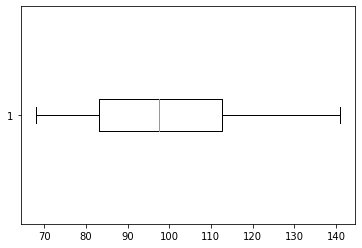

In [12]:
# If vert is False, draw horizontal boxes.
plt.boxplot(ap_data.Correct,vert=False) # ✅ matplotlib.pyplot.boxplot
plt.show()

# 2. Measures of Association Between Two Variables

In [13]:
mf_data = pd.read_excel('MutualFunds.xlsx')
mf_data.dropna(inplace=True)
mf_data.head()

,Fund Name,Fund Type,Net Asset Value ($),5 Year Average Return (%),Expense Ratio (%),Morningstar Rank
0,Amer Cent Inc & Growth Inv,DE,28.88,12.39,0.67,2-Star
1,American Century Intl. Disc,IE,14.37,30.53,1.41,3-Star
2,American Century Tax-Free Bond,FI,10.73,3.34,0.49,4-Star
3,American Century Ultra,DE,24.94,10.88,0.99,3-Star
4,Ariel,DE,46.39,11.32,1.03,2-Star


## 2-1. Covariance

### Between net asset value & 5 year average return

### $s_{xy} = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{n-1}$

In [14]:
n = len(mf_data)
xi_x = mf_data['5 Year Average Return (%)'] - mf_data['5 Year Average Return (%)'].mean()
yi_y = mf_data['Net Asset Value ($)'] - mf_data['Net Asset Value ($)'].mean()
s_xy = np.sum(xi_x * yi_y) / (n-1)

print('✍', s_xy)

✍ 55.09443974747475


✅ **pandas.DataFrame.cov**
- This function computes the pairwise covariance among the series of a DataFrame
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html

In [15]:
cov_table = mf_data.cov() # ✅ pandas.DataFrame.cov
s_xy = cov_table['Net Asset Value ($)']['5 Year Average Return (%)']

print('🤖', s_xy)

🤖 55.09443974747475


## 2-2. Correlation Coefficient

### Between net asset value & 5 year average return

### $r_{xy} = \frac{s_{xy}}{s_x s_y}$

In [16]:
s_x = mf_data['5 Year Average Return (%)'].std()
s_y = mf_data['Net Asset Value ($)'].std()
corr = s_xy / (s_x*s_y)
print('✍',corr)

✍ 0.4156474739623341


✅ **pandas.DataFrame.corr**
- This function computes pairwise correlation of columns
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [17]:
corr_table = mf_data.corr() # ✅ pandas.DataFrame.corr
corr = corr_table['Net Asset Value ($)']['5 Year Average Return (%)']
print('🤖', corr)

🤖 0.4156474739623342


# 3. Working with Grouped Data

To work with grouped data, we need to determine classes as we did in python code #01.

In [18]:
class_width = 10
bins = list(range(60, 151, class_width)) 
labels = [f'{x}-{x+class_width-1}' for x in bins[:-1]]

ap_data['Class'] = pd.cut(ap_data["Correct"], bins, labels=labels, right=False) 
ap_table = pd.DataFrame(ap_data.Class.value_counts()).sort_index()
ap_table.columns = ['fi']

✅ **zip**
- This function helps to iterate over several iterables in parallel.
- https://docs.python.org/3/library/functions.html#zip

In [19]:
# Get Mid-point
ap_table["Mi"] = [i+(j-i)/2 for i,j in zip(bins[:-1], bins[1:])] # ✅ zip
ap_table.head(10)

,fi,Mi
60-69,2,65.0
70-79,6,75.0
80-89,8,85.0
90-99,11,95.0
100-109,9,105.0
110-119,7,115.0
120-129,4,125.0
130-139,2,135.0
140-149,1,145.0


## 3-1. Sample Mean for Grouped Data

### $\bar{x} = \frac{\sum{f_iM_i}}{n}$

In [20]:
n = np.sum(ap_table["fi"])
s_mean = np.sum(ap_table["fi"]*ap_table["Mi"])/n
print(f'Sample Mean: {s_mean:.02f}')

Sample Mean: 99.40


## 3-2. Sample Variance for Grouped Data

### $s^2 = \frac{\sum{f_i(M_i-\bar{x})^2}}{n-1}$

In [21]:
s_var =np.sum(ap_table["fi"] * np.power(ap_table["Mi"] - s_mean, 2)) / (n-1)
print(f'Sample Variance: {s_var :.02f}')

Sample Variance: 347.59


## 3-3. Sample Standard Deviation for Grouped Data

In [22]:
s_sig = np.sqrt(s_var)
print(f'Sample Standard Deviation: {s_sig :.02f}')

Sample Standard Deviation: 18.64
